# 3. Data Visualization with matplotlib

Khi nào nên sử dụng chart nào, ví dụ bằng hình ảnh trong slides

## 3.1 Figure and Axes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Figure là một container chứa mọi thứ cần vẽ ra màn hình như: tọa độ, hình vẽ, chữ, labels, màu ....<br>
Axes là một thành phần của figure chứa labels và các hình vẽ

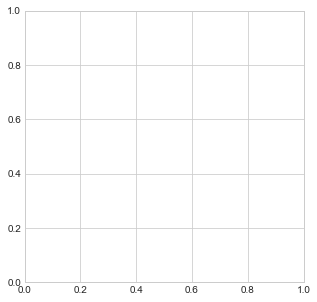

In [2]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

Vẽ thử đường hình sin của list x lên Axes

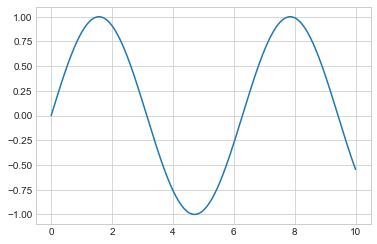

In [3]:
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

Không cần khai báo axes, nó sẽ tự động sinh ra background. Chỉ khai báo khi muốn tinh chỉnh config các thông số của ảnh

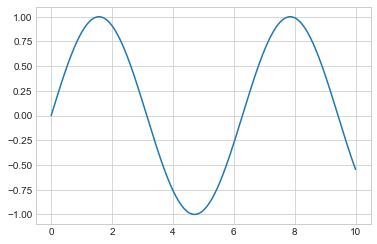

In [4]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

Vẽ nhiều đường lên cùng 1 ảnh

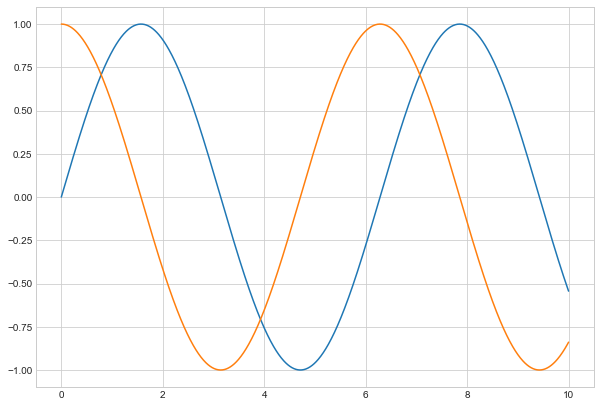

In [5]:
fig = plt.figure(figsize=(10, 7))
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# Set color cho lines

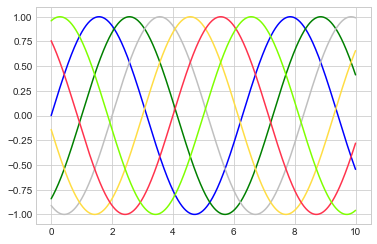

In [6]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names

Linestyle

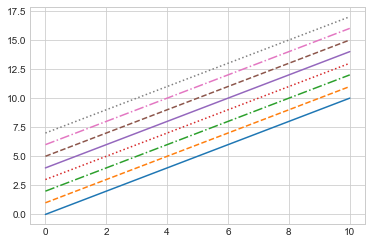

In [7]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# Có thể thay bằng các shortcut của style:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

Có thể combine các style và color với nhau sử dụng non-keyword params

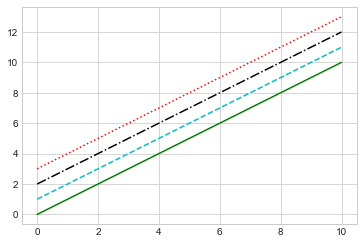

In [8]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r')  # dotted red

# Thay đổi size của axes

Sử dụng `xlim` và `ylim` với thông số min và max theo arg 1 và 2

(-1.5, 1.5)

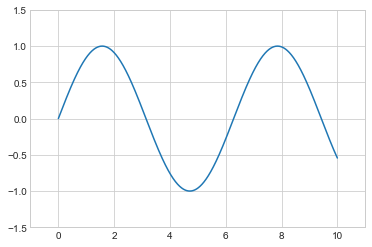

In [9]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

(1.2, -1.2)

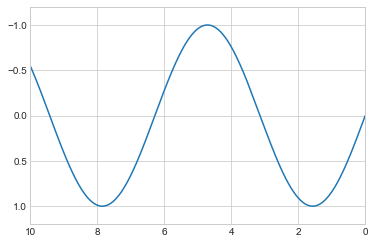

In [10]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

Sử dụng `axis` (not `axes`) để set toàn bộ thông số cho x và y trong cùng 1 lệnh theo thứ tự: `[xmin, xmax, ymin, ymax]`

(-1.0, 11.0, -1.5, 1.5)

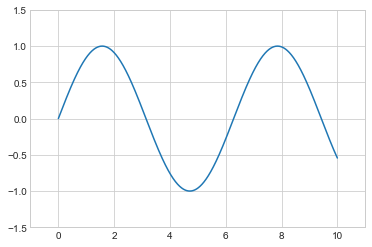

In [11]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

Hoặc muốn set boundary của axis sát vào hình vẽ

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

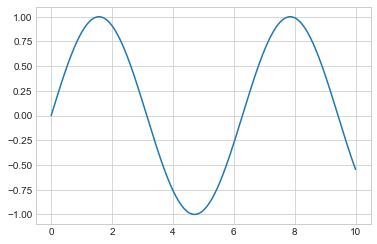

In [12]:
plt.plot(x, np.sin(x))
plt.axis('tight')

# Label cho Plot

Dùng các function để set label như `title`, `xlabel`, `ylabel`

Text(0, 0.5, 'sin(x)')

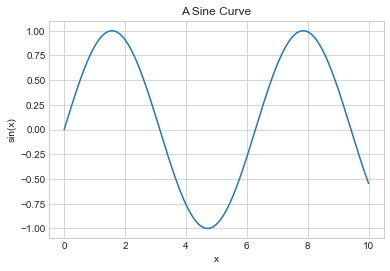

In [13]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

Với nhiều lines trên cùng 1 axes, có thể assign label cho nó trong hàm plot, và dùng `legend` để vẽ và hiển thị label<br>
Nếu chỉ `plot` như trước, thì vẫn vẽ được 2 lines trên cùng 1 axes nhưng sẽ không hiển thị được label

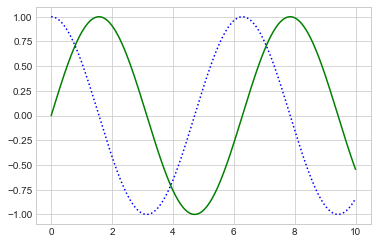

In [14]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

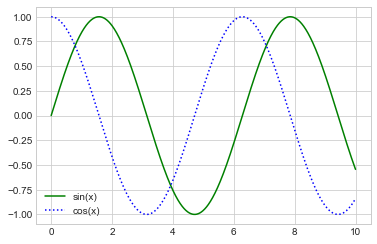

In [15]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.legend()

## Khi nào vẽ đường lines?<br>
Khi data có sự thay đổi theo 1 khoảng thời gian liên tục. Nên sử dụng để mô tả về các thể loại liên quan đến trend, khi số lượng data points tương đối nhiều, trên 20 điểm dữ liệu.

In [16]:
import pandas as pd
df = pd.read_csv("../data/pr_all.csv")
df.head()

,Data_Status,State,MSN,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2020F,AK,ARICD,0.57,0.81,0.82,0.85,1.74,1.80,1.62,...,15.73,17.66,16.96,16.33,13.93,10.61,10.50,12.86,14.24,13.02
1,2020F,AK,ARTCD,0.57,0.81,0.82,0.85,1.74,1.80,1.62,...,15.73,17.66,16.96,16.33,13.93,10.61,10.50,12.86,14.24,13.02
2,2020F,AK,ARTXD,0.57,0.81,0.82,0.85,1.74,1.80,1.62,...,15.73,17.66,16.96,16.33,13.93,10.61,10.50,12.86,14.24,13.02
3,2020F,AK,AVACD,2.17,2.21,2.19,2.36,3.23,3.45,3.59,...,31.64,33.04,32.71,33.16,24.86,21.62,24.13,27.04,25.57,22.34
4,2020F,AK,AVTCD,2.17,2.21,2.19,2.36,3.23,3.45,3.59,...,31.64,33.04,32.71,33.16,24.86,21.62,24.13,27.04,25.57,22.34


In [17]:
df_ = df.loc[(df["State"] == "AK") & (df["MSN"] == "ARICD")]
print(df_.shape)
df_.head()

(1, 54)


,Data_Status,State,MSN,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2020F,AK,ARICD,0.57,0.81,0.82,0.85,1.74,1.8,1.62,...,15.73,17.66,16.96,16.33,13.93,10.61,10.5,12.86,14.24,13.02


In [18]:
selected_columns = []
for column in df_:
    try:
        if int(column) >= 2000:
            selected_columns.append(True)
        else:
            selected_columns.append(False)
    except:
        selected_columns.append(False)
df_ = df_.loc[:, selected_columns]
df_.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3.45,3.75,3.83,4.2,4.7,5.0,5.62,6.63,6.86,13.37,...,15.73,17.66,16.96,16.33,13.93,10.61,10.5,12.86,14.24,13.02


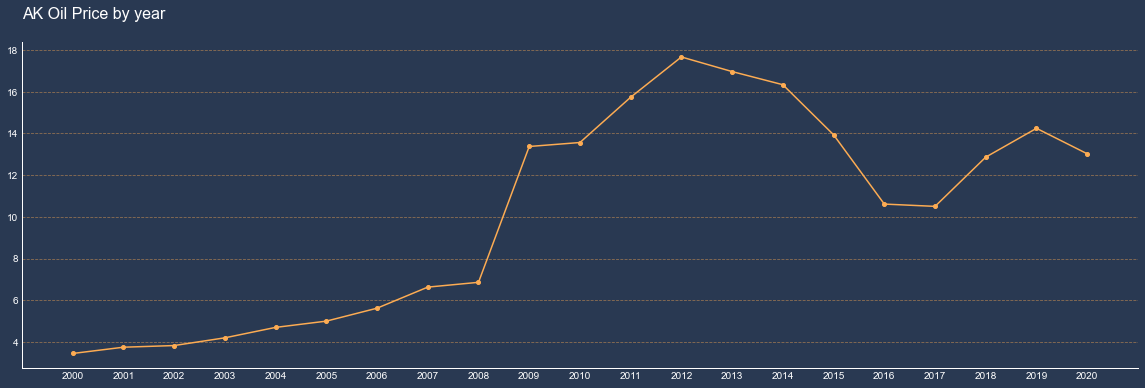

In [19]:
# figure
fig, ax = plt.subplots(1, figsize=(20,6), facecolor='#293952')
ax.set_facecolor('#293952')
# plot x-axis, y-axis
# marker là tại từng điểm data point, vẽ 1 ký tự (hình tròn) để mark vào điểm tương ứng
plt.plot(df_.columns, df_.values[0], marker='o', markersize=4, color='#FDAC53', linewidth=1.5)
# ticks n title - phần gạch nhô ra của từng label trong 1 chiều nhất định, both là cả 2 chiều đều có
ax.tick_params(axis='both', colors='w')
plt.xticks(df_.columns)
plt.title('AK Oil Price by year\n', loc='left', color='w', fontsize=16)
# spines - phần boundary line của axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid - set dòng kẻ grid theo từng chiều
ax.yaxis.grid(color='#FDAC53', linestyle='dashed', alpha=0.5)
ax.xaxis.grid(False)
# limits - set điểm bắt đầu, kết thúc của cột y
# plt.ylim(0,) # or -> ax.set_ylim(0,)
plt.show()

Vẽ nhiều line lên chart

In [20]:
df_tx = df.loc[(df["State"] == "TX") & (df["MSN"] == "ARICD")]
df_dc = df.loc[(df["State"] == "DC") & (df["MSN"] == "ARICD")]
df_tx = df_tx.loc[:, selected_columns]
df_dc = df_dc.loc[:, selected_columns]

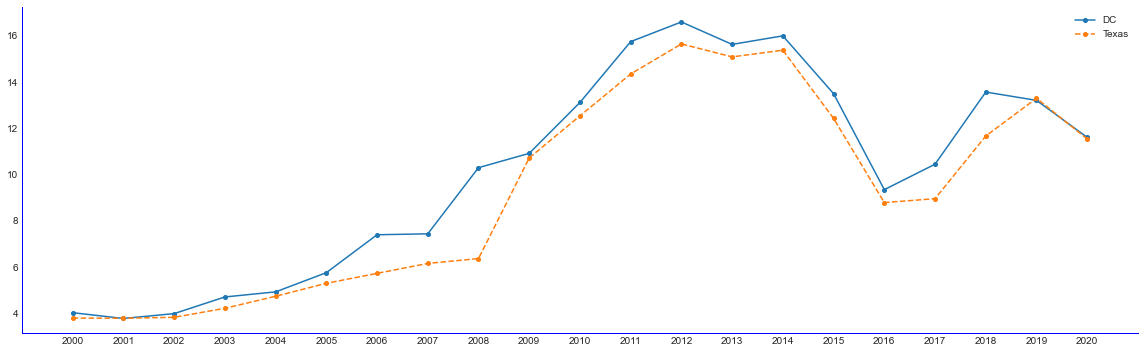

In [21]:
fig, ax = plt.subplots(1, figsize=(20,6))
# plot lines
plt.plot(df_dc.columns, df_dc.values[0], marker='o', markersize=4, linewidth=1.5, label = "DC", linestyle="-")
plt.plot(df_tx.columns, df_tx.values[0], marker='o', markersize=4, linewidth=1.5, label = "Texas", linestyle="--")

plt.xticks(df_tx.columns)
# spines - phần boundary line của axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('b')
ax.spines['bottom'].set_color('b')

plt.grid(False)
# ax.set_ylim(min(df_dc.population), )
# show mục label của từng line
plt.legend()
# show hình
plt.show()

### The Dos and Don’ts for Line Charts
- Thể hiện data thay đổi theo thời gian, data ở cột thời gian phải có khoảng cách bằng nhau.
- For line charts, the axis may not start from zero if the intended message of the chart is the rate of change or overall trend, not exact values or comparison. It’s best to start the axis with zero for wide audiences because some people may otherwise interpret the chart incorrectly.
- In line charts, time should always run from left to right.
- Do not skip values for consistent data intervals presenting trend information, for example, certain days with zero values.
- Remove guidelines to emphasize the trend, rate of change, and to reduce distraction.
- Use a proper aspect ratio to show important information and avoid dramatic slope effects. For the best perception, aim for a 45-degree slope

# Area Charts

Area chart tương tự như line chart - thường được dùng để mô tả trend và so sánh theo thời gian. Area chart thì phần dưới của line chart sẽ được tô màu, nên sử dụng area chart cho những data dạng giá trị tích lũy theo thời gian, ví dụ là số khách hàng có được theo từng quý của công ty, số doanh thu theo thời gian của công ty, ...

KHÔNG nên sử dụng area chart để mô tả các biến thay đổi giá trị theo thời gian nhưng không có ý nghĩa về mặt tích lũy, như giá cổ phiếu.

Ví dụ về doanh thu từ việc quảng cáo trên báo của 1 công ty báo chí

In [22]:
df = pd.read_csv("../data/USnewspapers.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,Year,Ads_currentGdollars,Ads_G2012dollars,Circ_currentGdollars,Circ_G2012dollars,Revenue_currentGdollars,Revenue_G2012dollars,AdsProportion,GDP_nominalG,GDP_G2012,newspaperAds_p_GDP,newspapers_p_GDP,Population_M,RevenuePerCap_nominal,RevenuePerCap_2012
0,1956,3.223000,21.044885,1.344492,8.778988,4.567492,29.823873,0.705639,449.4,2934.4,0.007172,0.010164,168.221,27.151735,177.289833
1,1957,3.268000,20.657345,1.373464,8.681799,4.641464,29.339144,0.704088,474.0,2996.2,0.006895,0.009792,171.274,27.099642,171.299464
2,1958,3.176000,19.628894,1.459013,9.017258,4.635013,28.646153,0.685219,481.2,2974.0,0.006600,0.009632,174.141,26.616437,164.499760
3,1959,3.526000,21.493934,1.549576,9.445968,5.075576,30.939902,0.694699,521.7,3180.2,0.006759,0.009729,177.130,28.654525,174.673414
4,1960,3.681000,22.138256,1.604228,9.648142,5.285228,31.786398,0.696469,542.4,3262.1,0.006787,0.009744,180.760,29.238925,175.848628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2016,18.274944,17.282950,10.910460,10.318223,29.185404,27.601174,0.626167,18695.1,17680.3,0.000978,0.001561,323.186,90.305286,85.403370
61,2017,16.476453,15.291867,11.211011,10.404987,27.687464,25.696854,0.595087,19479.6,18079.1,0.000846,0.001421,325.220,85.134568,79.013756
62,2018,14.346024,13.003897,10.995342,9.966685,25.341366,22.970582,0.566111,20527.2,18606.8,0.000699,0.001235,326.949,77.508621,70.257386
63,2019,12.450470,11.087376,11.033102,9.825184,23.483572,20.912560,0.530178,21372.6,19032.7,0.000583,0.001099,328.527,71.481407,63.655530


In [23]:
df_ = df[["Year", "Ads_currentGdollars"]]
df_ = df_[df_["Year"] > 1990]
df_.head()

,Year,Ads_currentGdollars
35,1991,30.349
36,1992,30.639
37,1993,31.869
38,1994,34.109
39,1995,36.092


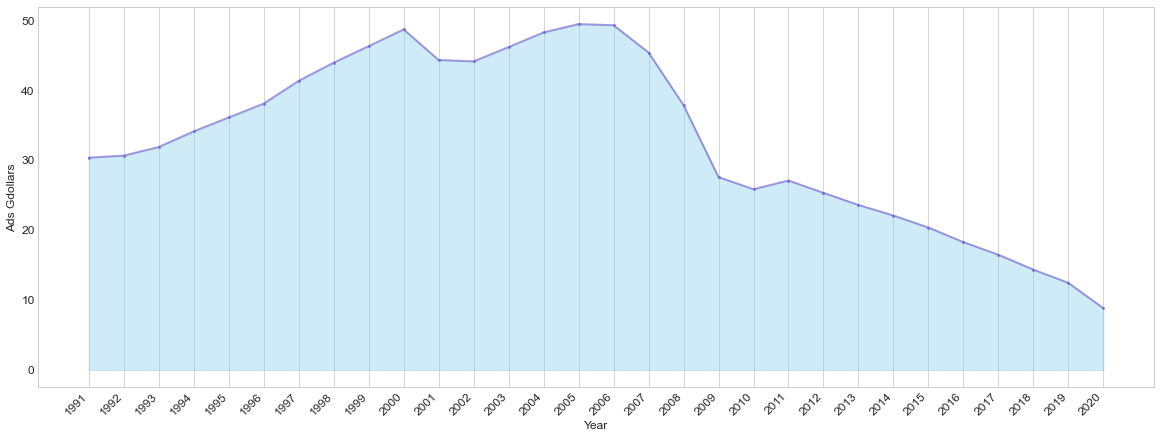

In [24]:
# fig, ax = plt.subplots(1, figsize=(20, 7))
fig = plt.figure(figsize=(20, 7))
ax = plt.axes()
ax.yaxis.grid(False)

# alpha is like opacity
plt.fill_between(df_.Year, df_.Ads_currentGdollars, color="skyblue", alpha=0.4)
plt.plot(df_.Year, df_.Ads_currentGdollars, color="Slateblue", alpha=0.6, linewidth=2, marker='o', markersize=2)
plt.xticks(df_.Year, rotation=45, ha="right")
plt.tick_params(labelsize=12)
plt.xlabel("Year", size=12)
plt.ylabel("Ads Gdollars", size=12)
plt.show()

## Stacked Area

Được sử dụng khi muốn show các thành phần con của 1 biến thay đổi theo thời gian. Ví dụ:<br>
- Số cổ phần của các cổ đông theo thời gian
- Doanh số của các hãng hàng không trong báo cáo hàng không theo thời gian
- Dân số của các châu lục trên thế giới theo thời gian

Không nên có nhiều hơn 5 thành phần của một biến

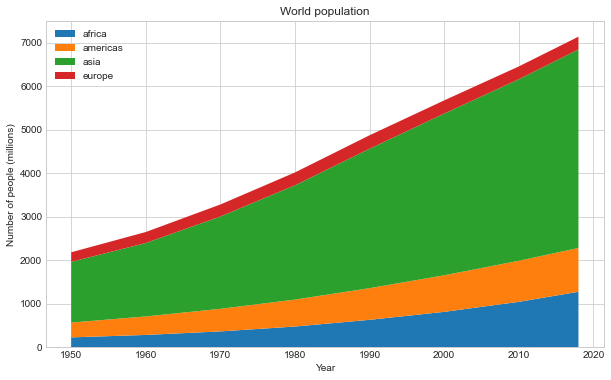

In [25]:
fig, ax = plt.subplots(1, figsize=(10, 6))

year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
   'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
   'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
   'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
   'europe': [220, 253, 276, 295, 310, 303, 294, 293],
}
ax.stackplot(year, population_by_continent.values(), labels=population_by_continent.keys())

ax.legend(loc='upper left')
ax.set_title('World population')

ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

## Column Charts

Best practices for column charts

- Sử dụng column chart khi muốn so sánh các category khác nhau, nhưng số category phải nhỏ, không quá 7 loại.
- Nếu có 1 chiều của bảng là về thời gian, thì nên set chiều đó là chiều ngang.
- Số bắt đầu của column chart luôn luôn nên bắt đầu từ 0, vì nếu bắt đầu khác không thì hình ảnh hiển thị sẽ dễ làm người đọc đưa ra các nhận định sai về contribution của category mang lại.
- Nếu muốn sử dụng column chart để hiển thị trend, thì số data point không được quá 20. Nhưng tốt nhất không nên sử dụng column chart để hiển thị trend

In [26]:
df2 = pd.read_csv("../data/state-areas.csv")
df2.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [27]:
df2_ = df2.head()

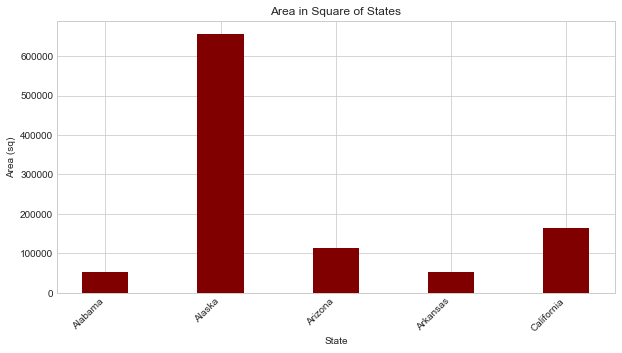

In [28]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# category or time, value
plt.bar(df2_.state, df2_["area (sq. mi)"], color ='maroon', width = 0.4)
 
plt.xlabel("State")
plt.ylabel("Area (sq)")
plt.title("Area in Square of States")
# Diagonal tick labels
plt.xticks(rotation=45, ha="right")

plt.show()

### Double Bar Chart

Sử dụng double bar khi muốn so sánh 2 nhóm

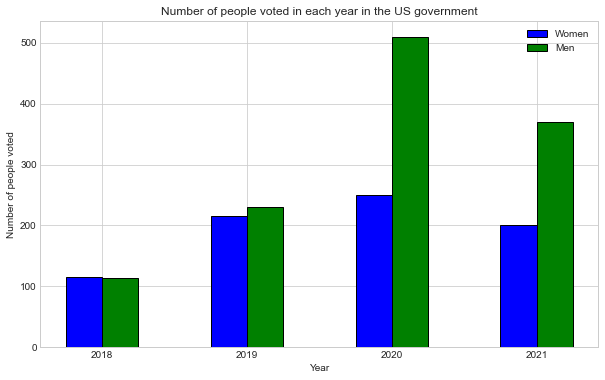

In [29]:
import numpy as np

fig = plt.figure(figsize=(10, 6))
Women = [115, 215, 250, 200]
Men = [114, 230, 510, 370]
  
n=4
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, Women, color = 'b',
        width = width, edgecolor = 'black',
        label='Women')
plt.bar(r + width, Men, color = 'g',
        width = width, edgecolor = 'black',
        label='Men')
  
plt.xlabel("Year")
plt.ylabel("Number of people voted")
plt.title("Number of people voted in each year in the US government")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['2018','2019','2020','2021'])
plt.legend()
  
plt.show()

### Stacked Column Charts

Tương tự như column chart ở trên, được dùng để mô tả một số category, tuy nhiên mỗi category có nhiều thành phần hoặc các lớp con trùng nhau, thì có thể dùng stacked column. Tuy nhiên số lượng category trong 1 column không nên nhiều hơn 4.

In [30]:
df = pd.read_csv("../data/state_demographics.csv")
df.head()

,State,Population.Population Percent Change,Population.2014 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,...,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49


Thống kê population năm 2014 của 5 states đầu, stacked theo độ tuổi

In [31]:
df_ = df.head(5)
df_ = df_[["State", "Population.2014 Population", "Age.Percent Under 5 Years", "Age.Percent Under 18 Years", "Age.Percent 65 and Older"]]
df_["Age.Percent Under 5 Years"] = df_["Age.Percent Under 5 Years"]*df["Population.2014 Population"]//100
df_["Age.Percent Under 18 Years"] = df_["Age.Percent Under 18 Years"]*df["Population.2014 Population"]//100
df_["Age.Percent 65 and Older"] = df_["Age.Percent 65 and Older"]*df["Population.2014 Population"]//100
df_["Age.Percent 18-65"] = df["Population.2014 Population"] - df_["Age.Percent 65 and Older"] - df_["Age.Percent Under 18 Years"] - df_["Age.Percent Under 5 Years"]
df_.rename(columns={"Population.2014 Population": "Population", "Age.Percent Under 5 Years": "Under 5", "Age.Percent Under 18 Years": "Under 18", "Age.Percent 18-65": "Under 65", "Age.Percent 65 and Older": "Above 65"}, inplace=True)
df_

,State,Population,Under 5,Under 18,Above 65,Under 65
0,Connecticut,3605944,183903.0,735612.0,638252.0,2048177.0
1,Delaware,989948,55437.0,206899.0,192049.0,535563.0
2,District of Columbia,689545,44130.0,125497.0,85503.0,434415.0
3,Florida,21538187,1141523.0,4243022.0,4501481.0,11652161.0
4,Georgia,10711908,664138.0,2528010.0,1531802.0,5987958.0


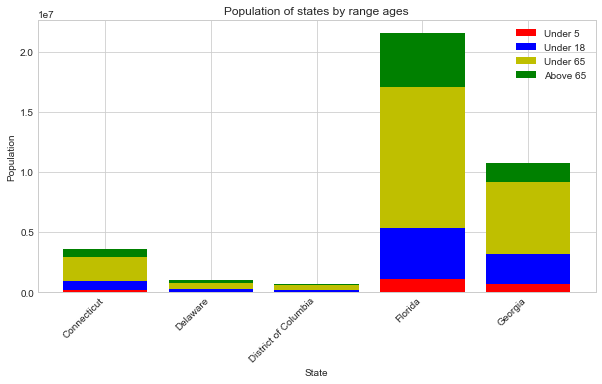

In [32]:
fig = plt.figure(figsize = (10, 5))

# plot bars in stack manner
plt.bar(df_.State, df_["Under 5"], color='r', label="Under 5")
plt.bar(df_.State, df_["Under 18"], bottom=df_["Under 5"], color='b', label="Under 18")
plt.bar(df_.State, df_["Under 65"], bottom=df_["Under 5"]+df_["Under 18"], color='y', label="Under 65")
plt.bar(df_.State, df_["Above 65"], bottom=df_["Under 5"]+df_["Under 18"]+df_["Under 65"], color='g', label="Above 65")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Under 5", "Under 18", "Under 65", "Above 65"])
plt.title("Population of states by range ages")

plt.xticks(rotation=45, ha="right")
plt.show()


# Bar charts

Nếu tên của category dài, thì việc sử dụng bar chart là tốt nhất, vì nó sẽ cho khoảng cách để thể hiện label tốt hơn.<br>
Hoặc sử dụng bar chart khi có nhiều category hơn, dưới 15 category.<br>
Hoặc sử dụng khi có dữ liệu về số âm.


- A typical use of bar charts would be visitor traffic from top referral websites. Referring sites are usually more than five to seven sites and website names are quite long, so those should be better horizontally graphed.
- Another example could be sales performance by sales representatives. Again, names can be quite long, and there might be more than seven sales reps.


In [33]:
s = df.State.str.len().sort_values(ascending=False).index
df_ = df.reindex(s)
df_ = df_.head(10)
df_ = df_[["State", "Population.2014 Population"]]
df_.rename(columns={"Population.2014 Population": "Population"}, inplace=True)
df_

,State,Population
2,District of Columbia,689545
40,South Carolina,5118425
45,North Carolina,10439388
27,Massachusetts,7029917
48,West Virginia,1793716
17,New Hampshire,1377529
41,South Dakota,886667
46,North Dakota,779094
38,Pennsylvania,13002700
39,Rhode Island,1097379


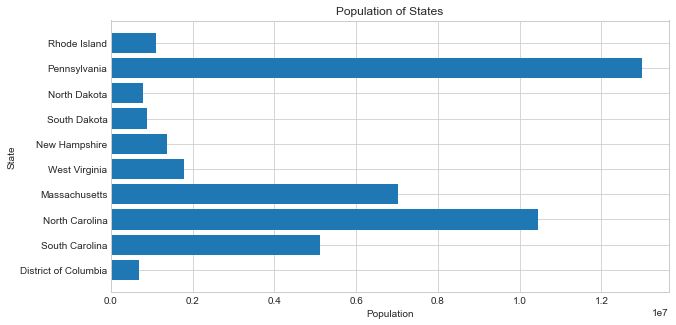

In [34]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df_.State, df_.Population)
 
# setting label of y-axis
plt.ylabel("State")
 
# setting label of x-axis
plt.xlabel("Population")
plt.title("Population of States")
plt.show()

# Pie Charts and Donut Charts


Không nên sử dụng chart này, vì mắt người rất khó để so sánh 2 phần trong hình tròn. Nên thay bằng biểu đồ cột hoặc stacked column

In [35]:
df = pd.read_csv("../data/state_demographics.csv")
df_ = df.head(1)
df_ = df_[["State", "Population.2014 Population", "Age.Percent Under 5 Years", "Age.Percent Under 18 Years", "Age.Percent 65 and Older"]]
df_["Age.Percent Under 5 Years"] = df_["Age.Percent Under 5 Years"]*df["Population.2014 Population"]//100
df_["Age.Percent Under 18 Years"] = df_["Age.Percent Under 18 Years"]*df["Population.2014 Population"]//100
df_["Age.Percent 65 and Older"] = df_["Age.Percent 65 and Older"]*df["Population.2014 Population"]//100
df_["Age.Percent 18-65"] = df["Population.2014 Population"] - df_["Age.Percent 65 and Older"] - df_["Age.Percent Under 18 Years"] - df_["Age.Percent Under 5 Years"]
df_.rename(columns={"Population.2014 Population": "Population", "Age.Percent Under 5 Years": "Under 5", "Age.Percent Under 18 Years": "Under 18", "Age.Percent 18-65": "Under 65", "Age.Percent 65 and Older": "Above 65"}, inplace=True)
df_

,State,Population,Under 5,Under 18,Above 65,Under 65
0,Connecticut,3605944,183903.0,735612.0,638252.0,2048177.0


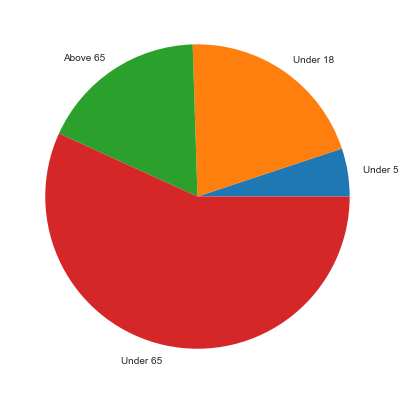

In [36]:
fig = plt.figure(figsize=(7, 7))
y = df_.loc[:, "Under 5":"Under 65"]
mylabels = y.columns
y = y.values[0]

plt.pie(y, labels = mylabels)
plt.show() 

# Scatter Charts

Thường được sử dụng để quan sát tương quan của 2 khía cạnh trong một tập data. Ví dụ cơ bản nhất là về giá nhà dựa vào 1 đặc tính như diện tích. Từ chart này ta có thể thấy pattern của giá nhà thay đổi theo diện tích. Hoặc có thể tìm ra những điểm abnormal/outliers của tập dữ liệu quan sát

Vẽ scatter chart cho dân số và diện tích của nước mỹ

In [37]:
df = pd.read_csv("../data/state_demographics.csv")
df = df[["State", "Population.2014 Population", "Miscellaneous.Land Area"]]
df.rename(columns={"Population.2014 Population": "population", "Miscellaneous.Land Area": "area"}, inplace=True)
df.head()

,State,population,area
0,Connecticut,3605944,4842.36
1,Delaware,989948,1948.54
2,District of Columbia,689545,61.05
3,Florida,21538187,53624.76
4,Georgia,10711908,57513.49


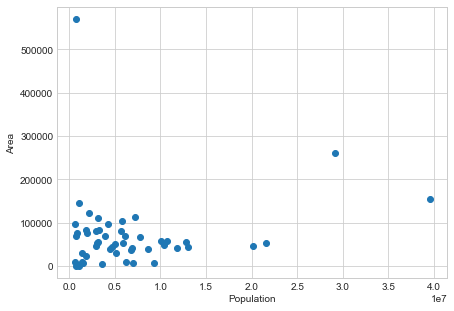

In [38]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(df.population, df.area)
plt.xlabel("Population")
plt.ylabel("Area")
plt.show()

## Bubble Chart

Bubble chart thường được sử dụng khi muốn thêm 1 dimension vào scatter chart. Scatter chart thường sẽ mô tả mối quan hệ và distribution của 2 biến, bubble chart sẽ thay đổi kích thước của bubble để làm biến thứ 3

In [39]:
import plotly.express as px
df = px.data.gapminder().query("year==2002")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32


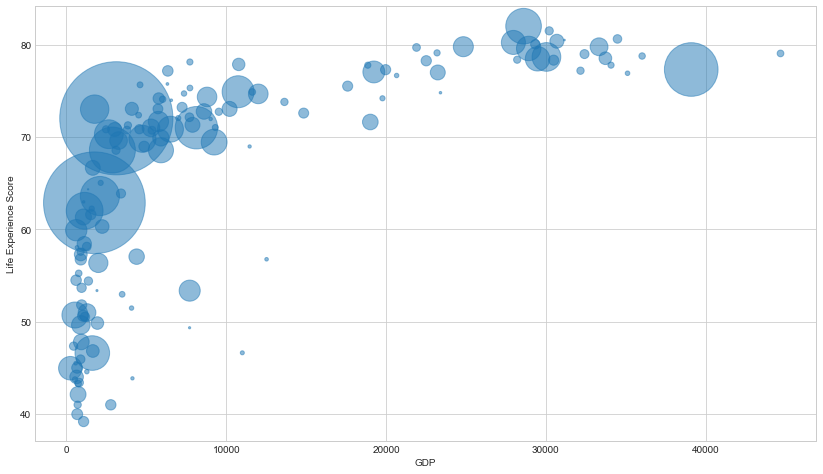

In [40]:
fig = plt.figure(figsize = (14, 8))
plt.xlabel("GDP")
plt.ylabel("Life Experience Score")
plt.scatter(df["gdpPercap"], df["lifeExp"], 
            s=df["pop"]*0.00001, alpha=0.5)
plt.show()